In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd

#визуализация
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')


import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

import os

%matplotlib inline 

In [2]:
os.getcwd()

'C:\\Users\\PC\\PycharmProjects\\Tinkoff_Investment\\lessons_and_tests\\ml_tests'

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a' #job.chap@icloud.com
api_key = 'c81352430e2fe3c941faf0814227562b' #jobs.chaps@gmail.com
# api_key = 'a765d11740cccfb61177da0ad8699d1e' #job.chap@gmail.com

In [4]:
''' Колонки '''
# ticker = 'ATEX'
ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
# df.tail(3)

,AAPL
Date,
2022-12-01 00:00:00-05:00,129.731918
2023-01-01 00:00:00-05:00,144.070023
2023-02-01 00:00:00-05:00,152.550003


In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
# df.tail(3)

,AAPL
Date_index,
2022-12-01,129.731918
2023-01-01,144.070023
2023-02-01,152.550003


In [7]:
''' добавляем цифру к году, чтобы видень данные как начало года, а не как факт '''
def change_index_plus_one(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        df_index[i] = str(int(df_index[i])+1)
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

In [8]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr = change_index_plus_one(df_key_metr)
# df_key_metr.head(3)

,period,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023,FY,24.317273,6.154614,7.532763,6.872426,2.978793,3.124822,3.124822,3.124822,7.585118,2423475620080.514648,2519898620080.514648,24.282593,6.145837,19.839998,21.746324,47.826721,47.826721,6.390362,18.926968,20.629374,22.611547,0.041182,0.045985,1.952933,0.856354,0.724234,0.879356,40.749574,1.223921,0.006124,0.148703,0,0.066571,0,-0.087662,-0.027155,-0.964337,0.02292,20.801964,0.600871,0.282924,-12.679296,-18577000000,None,-166678000000,2.369533,56219000000,59439000000,5763000000,56.400205,104.685277,8.075698,6.471608,3.486641,45.197331,1.969589,-0.660337
2022,FY,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.152799,0,0.059904,0,-0.106548,-0.030302,-0.982364,0.021612,21.950838,0.483099,0.269742,-10.978415,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,51.390969,93.851071,11.276593,7.102415,3.88914,32.367933,1.500713,-0.663722
2021,FY,15.820258,3.308587,4.64923,4.228014,5.241031,3.765477,3.765477,3.765477,6.64524,1996361344741.568848,2070781344741.568848,34.773151,7.272322,24.746031,27.211359,30.553901,30.553901,7.543418,25.558891,25.66851,28.225739,0.028758,0.036749,1.510078,0.798267,0.918539,1.363604,23.072746,1.405201,0.007053,0.245267,0,0.06831,0,-0.090599,-0.026625,-0.661089,0.024877,16.742586,0.303383,0.177256,-7.923629,38321000000,None,-114836000000,1.72081,44475500000,48529500000,5320500000,49.787534,91.04819,8.741883,7.331152,4.008866,41.753016,0.878664,-0.421217


In [9]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [10]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        # x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [11]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

In [12]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

In [13]:
df_with_changes_key.head(2)

,revenuePerShare,netIncomePerShare,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,bookValuePerShare,tangibleBookValuePerShare,shareholdersEquityPerShare,interestDebtPerShare,marketCap,enterpriseValue,peRatio,priceToSalesRatio,pocfratio,pfcfRatio,pbRatio,ptbRatio,evToSales,enterpriseValueOverEBITDA,evToOperatingCashFlow,evToFreeCashFlow,earningsYield,freeCashFlowYield,debtToEquity,debtToAssets,netDebtToEBITDA,currentRatio,interestCoverage,incomeQuality,dividendYield,payoutRatio,salesGeneralAndAdministrativeToRevenue,researchAndDdevelopementToRevenue,intangiblesToTotalAssets,capexToOperatingCashFlow,capexToRevenue,capexToDepreciation,stockBasedCompensationToRevenue,grahamNumber,roic,returnOnTangibleAssets,grahamNetNet,workingCapital,tangibleAssetValue,netCurrentAssetValue,investedCapital,averageReceivables,averagePayables,averageInventory,daysSalesOutstanding,daysPayablesOutstanding,daysOfInventoryOnHand,receivablesTurnover,payablesTurnover,inventoryTurnover,roe,capexPerShare,AAPL,SNP,change % revenuePerShare,change % netIncomePerShare,change % operatingCashFlowPerShare,change % freeCashFlowPerShare,change % cashPerShare,change % bookValuePerShare,change % tangibleBookValuePerShare,change % shareholdersEquityPerShare,change % interestDebtPerShare,change % marketCap,change % enterpriseValue,change % peRatio,change % priceToSalesRatio,change % pocfratio,change % pfcfRatio,change % pbRatio,change % ptbRatio,change % evToSales,change % enterpriseValueOverEBITDA,change % evToOperatingCashFlow,change % evToFreeCashFlow,change % earningsYield,change % freeCashFlowYield,change % debtToEquity,change % debtToAssets,change % netDebtToEBITDA,change % currentRatio,change % interestCoverage,change % incomeQuality,change % dividendYield,change % payoutRatio,change % salesGeneralAndAdministrativeToRevenue,change % researchAndDdevelopementToRevenue,change % intangiblesToTotalAssets,change % capexToOperatingCashFlow,change % capexToRevenue,change % capexToDepreciation,change % stockBasedCompensationToRevenue,change % grahamNumber,change % roic,change % returnOnTangibleAssets,change % grahamNetNet,change % workingCapital,change % tangibleAssetValue,change % netCurrentAssetValue,change % investedCapital,change % averageReceivables,change % averagePayables,change % averageInventory,change % daysSalesOutstanding,change % daysPayablesOutstanding,change % daysOfInventoryOnHand,change % receivablesTurnover,change % payablesTurnover,change % inventoryTurnover,change % roe,change % capexPerShare,change % AAPL,change % SNP
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022,21.903541,5.669029,6.229346,5.565624,3.750553,3.777557,3.777557,3.777557,7.626006,2482477060059.236816,2572256060059.236816,26.219656,6.786117,23.861253,26.706799,39.348186,39.348186,7.031538,20.889554,24.724198,27.672652,0.038139,0.037444,1.729371,0.820257,0.729104,1.074553,41.190548,1.098838,0.005828,0.152799,0,0.059904,0,-0.106548,-0.030302,-0.982364,0.021612,21.950838,0.483099,0.269742,-10.978415,9355000000,None,-153076000000,1.976843,51506000000,54763000000,6580000000,51.390969,93.851071,11.276593,7.102415,3.88914,32.367933,1.500713,-0.663722,173.506531,4515.549805,38.452490,71.342897,33.986602,31.636843,-28.438653,0.320806,0.320806,0.320806,14.75892,24.350087,24.216691,-24.597985,-6.685682,-3.575435,-1.854226,28.782855,28.782855,-6.785784,-18.268936,-3.678874,-1.959512,32.62245,1.889257,14.521932,2.754812,-20.623436,-21.197594,78.524688,-21.802068,-17.377394,-37.700890,0,-12.304712,0.0,17.603252,13.809871,48.597906,-13.123585,31.107809,59.237311,52.176785,38.552872,-75.587798,0.0,33.299662,14.878615,15.807579,12.844765,23.672587,3.220554,3.078459,28.995004,-3.120070,-2.986521,-22.477618,70.794977,57.572601,33.265718,21.573991
2021,15.820258,3.308587,4.64923,4.228014,5.241031,3.765477,3.765477,3.765477,6.64524,1996361344741.568848,2070781344741.568848,34.773151,7.272322,24.746031,27.21135

In [14]:
df_some_columns = df_with_changes_key[['change % debtToAssets', 'change % AAPL', 'change % cashPerShare']]

# удаляем последнюю строку, где значения равны 0
df_some_columns = df_some_columns.drop(df_some_columns.index[-1])
df_some_columns.head()

,change % debtToAssets,change % AAPL,change % cashPerShare
Date_index,,,
2022,2.754812,33.265718,-28.438653
2021,8.949814,72.013330,-3.727387
2020,3.629783,88.752962,62.753604
2019,9.984263,0.901130,-5.899555
2018,6.905238,40.191575,15.831258


In [15]:
''' pairplot''' 
# cols = ['change % debtToAssets', f'change % {ticker}', 'change % cashPerShare']
# sns_plot = sns.pairplot(df_some_columns[cols])

# sns_plot  # показать график

' pairplot'

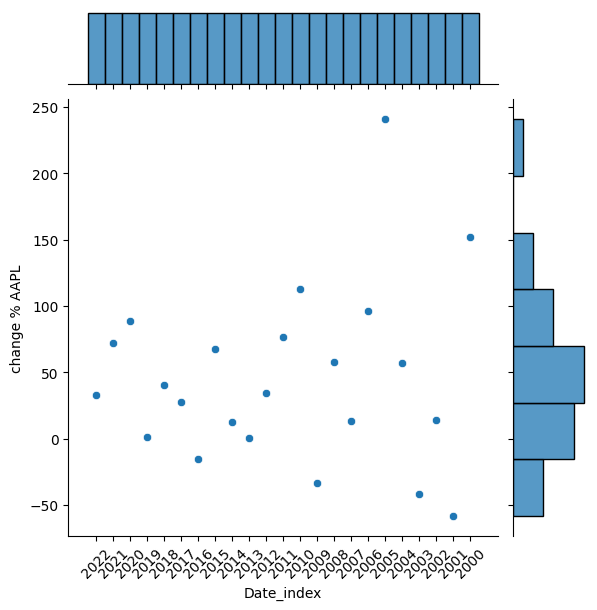

In [19]:
''' jointplot '''
# ax = sns.jointplot(df_some_columns[f'change % {ticker}'])
# ax.ax_joint.set_xticklabels(ax.ax_joint.get_xticklabels(), rotation=45)
# plt.show()